In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import theano.tensor as tt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=np.random.randn(100))

In [2]:
# Generate some toy data
np.random.seed(123)
x = np.linspace(0, 1, 50)
y = 2 * x - 1 + np.random.normal(0, 0.2, size=50)

In [25]:
# Define the model
with pm.Model() as model:
    # Define the priors
    alpha = pm.Normal("alpha", mu=0, sd=1)
    beta = pm.Normal("beta", mu=0, sd=1)
    sigma = pm.HalfNormal("sigma", sd=1)
    
    # Define the likelihood
    likelihood = pm.Normal("y", mu=alpha + beta * x, sd=sigma, observed=y)
    
    # Inference
    idata = pm.sample(2000, tune=2000, return_inferencedata=True)
  

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 40 seconds.


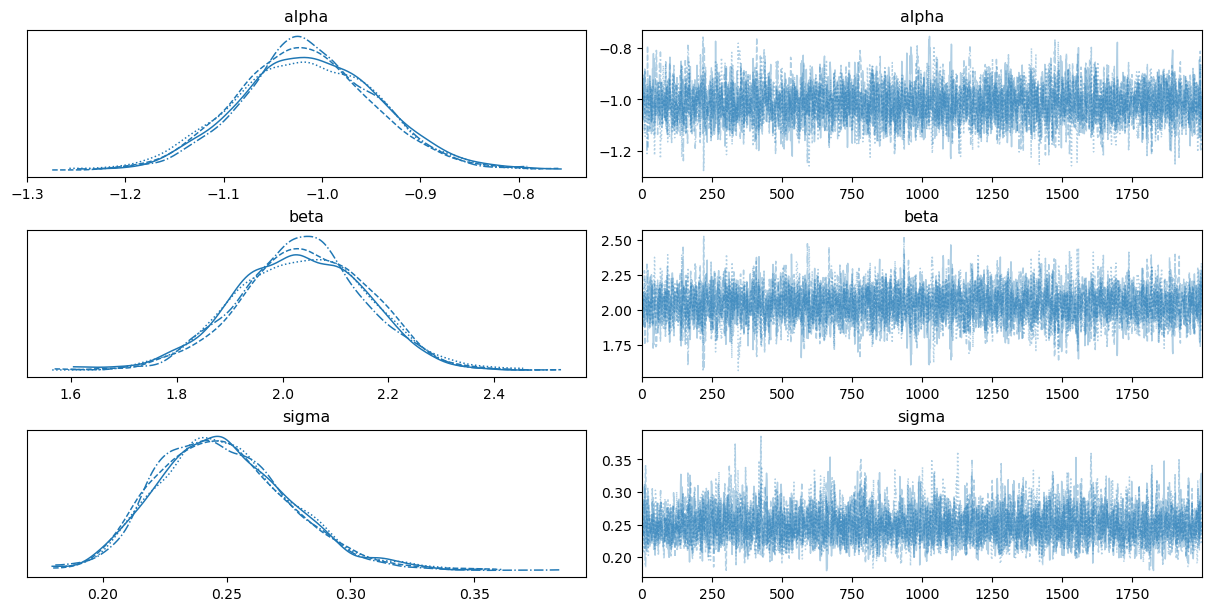

In [27]:
  
# Plot the results
arviz.plot_trace(idata)
plt.show()

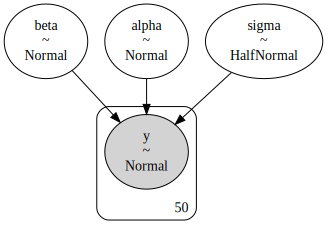

In [28]:
import arviz as az

pm.model_to_graphviz(model)

array([<AxesSubplot: title={'center': 'beta'}>,
       <AxesSubplot: title={'center': 'alpha'}>,
       <AxesSubplot: title={'center': 'sigma'}>], dtype=object)

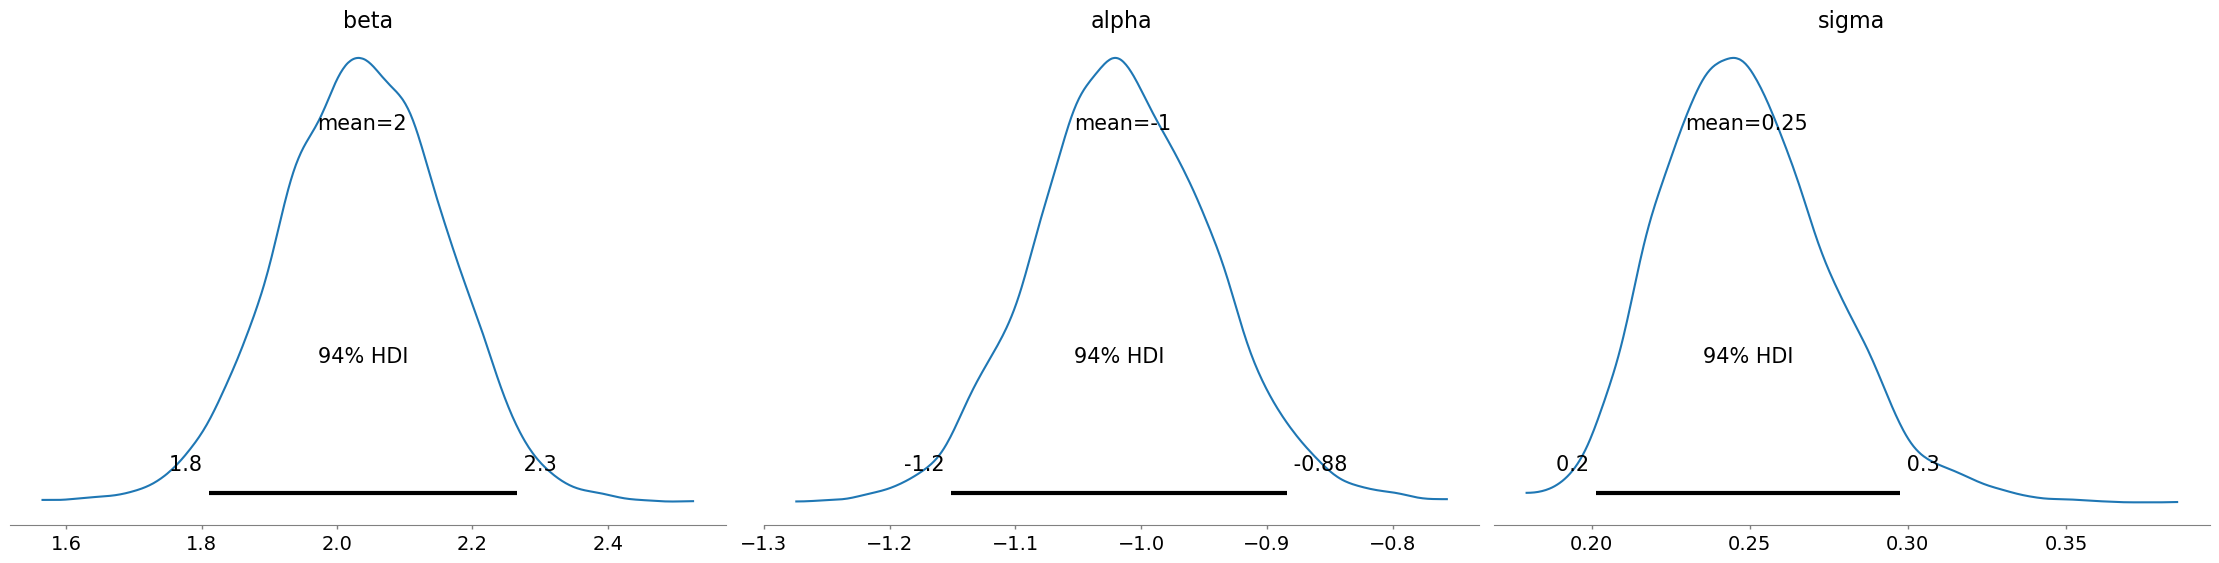

In [29]:
pm.plot_posterior(idata, var_names=['beta','alpha','sigma'])

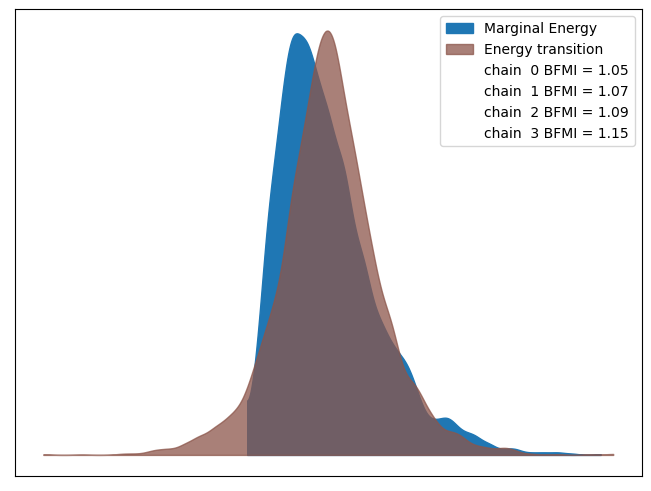

In [30]:
az.plot_energy(idata);

In [32]:
ppc = pm.sample_posterior_predictive(idata, samples=3000, model=model)

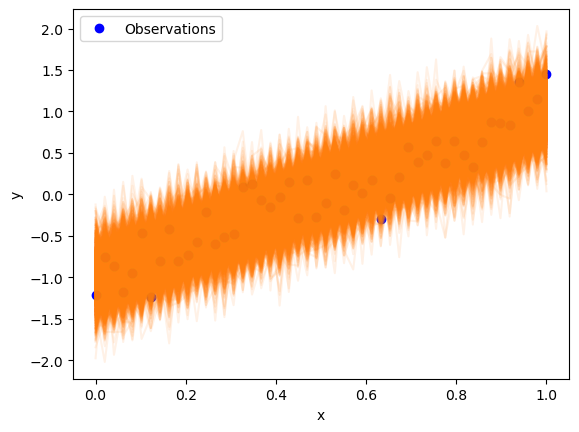

In [33]:
fig, ax = plt.subplots()
ax.plot(x, y, 'bo', label='Observations')
ax.plot(x, ppc['y'].T, 'C1-', alpha=0.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc=0);

In [47]:
post_pred = {"y": ppc["y"]}

# Convert the PyMC3 trace to an InferenceData object

# Concatenate the InferenceData object with the posterior predictive samples
az.concat(idata, az.from_pymc3(posterior_predictive=post_pred), inplace=True)

TypeError: Concatenating overlapping groups is not supported unless `dim` is defined. Valid dimensions are `chain` and `draw`. Alternatively, use extend to combine InferenceData with overlapping groups

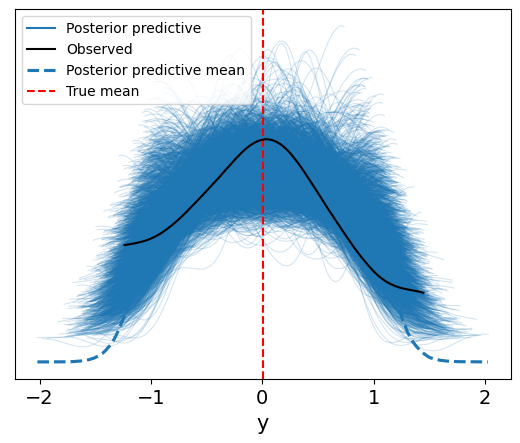

In [46]:
fig, ax = plt.subplots()
az.plot_ppc(idata, ax=ax)
ax.axvline(y.mean(), ls="--", color="r", label="True mean")
ax.legend(fontsize=10);

In [6]:
%load_ext watermark
%watermark -n -u -v -iv -w -t

Last updated: Mon Mar 27 2023 06:55:24

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.8.0

pymc3     : 3.11.4
matplotlib: 3.6.2
theano    : 1.1.2
numpy     : 1.23.5

Watermark: 2.3.1

